In [1]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 1378, done.
remote: Total 1378 (delta 0), reused 0 (delta 0), pack-reused 1378
Receiving objects: 100% (1378/1378), 66.58 MiB | 43.34 MiB/s, done.
Resolving deltas: 100% (810/810), done.


In [0]:
dir_path = "Neural-Style-Transfer"

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [0]:
NETWORK = 'INetwork' + '.py'

In [4]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [0]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.25e-1000000
STYLE_WEIGHT = 100000000000000000000000.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0


# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [50]:
from google.colab import files

content_img = files.upload()

Saving Webp.net-resizeimage-2.jpg to Webp.net-resizeimage-2.jpg


In [101]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : Webp.net-resizeimage-2.jpg


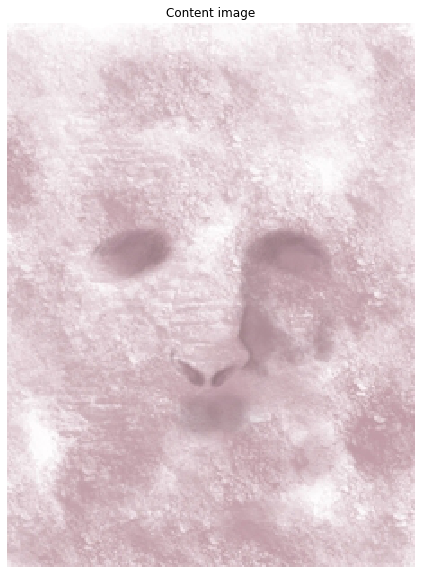

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [109]:
style_img = files.upload()

Saving Webp.net-resizeimage-21.jpg to Webp.net-resizeimage-21.jpg


In [110]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : Webp.net-resizeimage-21.jpg


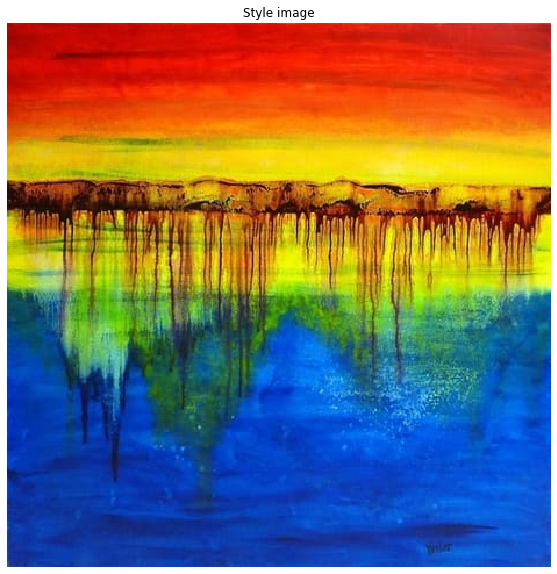

In [111]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

In [0]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [113]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.







2020-01-25 05:14:18.252629: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-01-25 05:14:18.252897: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x592ae00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-25 05:14:18.252937: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-25 05:14:18.255139: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-25 05:14:18.412388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-25 05:14:18.413153: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x592afc0 initialized for platform CUDA (this does not guarantee that XLA will be us

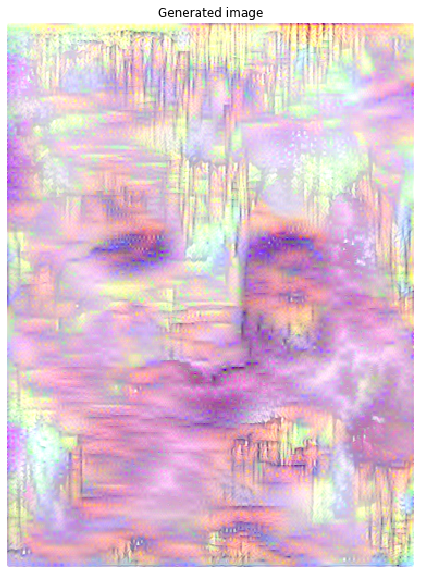

In [114]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# Download Generated Image

Run the following cell to download the final result

In [0]:
files.download(FINAL_IMAGE_PATH)

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
from IPython.display import Image
from PIL import Image
import time

In [2]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
haar_cascade_face = cv2.CascadeClassifier('cascadew.xml')

In [4]:
def detect_faces(cascade, test_image, scaleFactor =1.01):

    
    image_copy = test_image.copy()
    


    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
   
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image,scaleFactor=scaleFactor, minNeighbors=10)
    i=1
    for (x, y, w, h) in faces_rect:
        return True
    return False


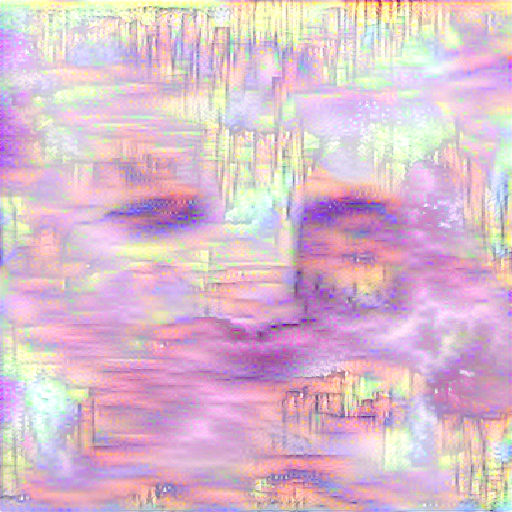

KeyboardInterrupt: 

In [5]:
cap = cv2.VideoCapture(0)

z=0
height= 512
width=512
content_image_path = 'aiart.png'
content_image = Image.open(content_image_path)
content_image = content_image.resize((height, width))
printed= False
while True:
    ret, img = cap.read()
    faces = detect_faces(haar_cascade_face,img)
    if faces:
        if not printed:
            display(content_image)
            printed = True
    z+=1
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break
        